## Machine Learning Module - Linear Regression


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = sns.load_dataset("tips")

In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df["tip"][:10]

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
5    4.71
6    2.00
7    3.12
8    1.96
9    3.23
Name: tip, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


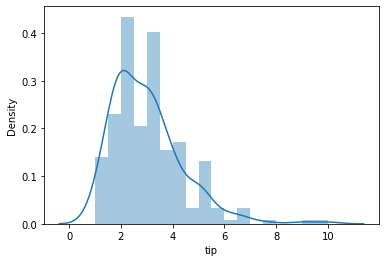

In [ ]:
sns.distplot(df['tip'])

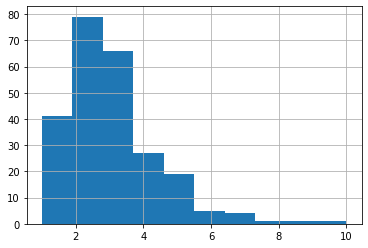

In [ ]:
df['tip'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


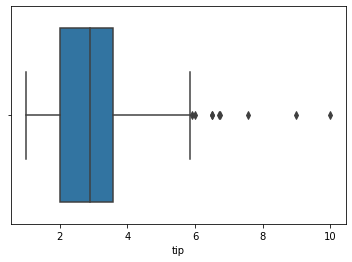

In [ ]:
sns.boxplot(df['tip'])

### Perdiction of a single varible

We would like to predict the tip size

What will be the best prediction assuming there is only a single variable?

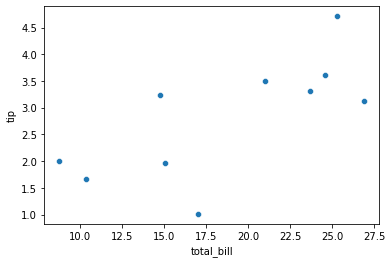

In [ ]:
min_df = df[:10]
sns.scatterplot(x='total_bill', y='tip', data=min_df)


Perdicting the dependent variable, assuming there is no independent variable.

The scope of the prediction is 0

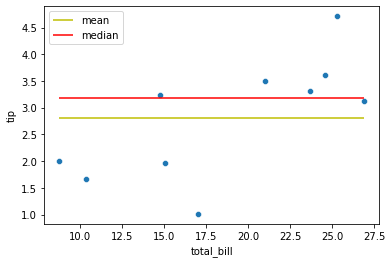

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=min_df)
plt.hlines(min_df['tip'].mean(), min_df['total_bill'].min(),  min_df['total_bill'].max(), colors='y', label='mean')
plt.hlines(min_df['tip'].median(), min_df['total_bill'].min(),  min_df['total_bill'].max(), colors='r', label='median')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


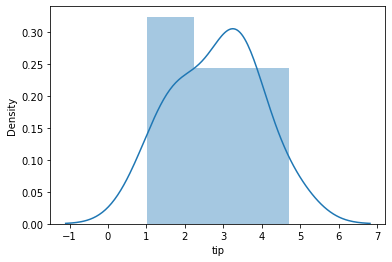

In [ ]:
sns.distplot(min_df['tip'])

In [ ]:
min_df['tip'].mean()

2.8110000000000004

In [ ]:
min_df['tip'].std()

1.1150331335385908

Conclustion: Mean is the best prediction when there is only one variable

In [ ]:
y_pred = pd.DataFrame(min_df['tip'].mean() * np.ones(len(min_df['tip'])), columns=['tip'])
y_pred

,tip
0,2.811
1,2.811
2,2.811
3,2.811
4,2.811
5,2.811
6,2.811
7,2.811
8,2.811
9,2.811


In [ ]:
y_test = min_df[['tip']]
y_test

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
5,4.71
6,2.00
7,3.12
8,1.96
9,3.23


### Mean Square Error

More info at [sklearn metrics and scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

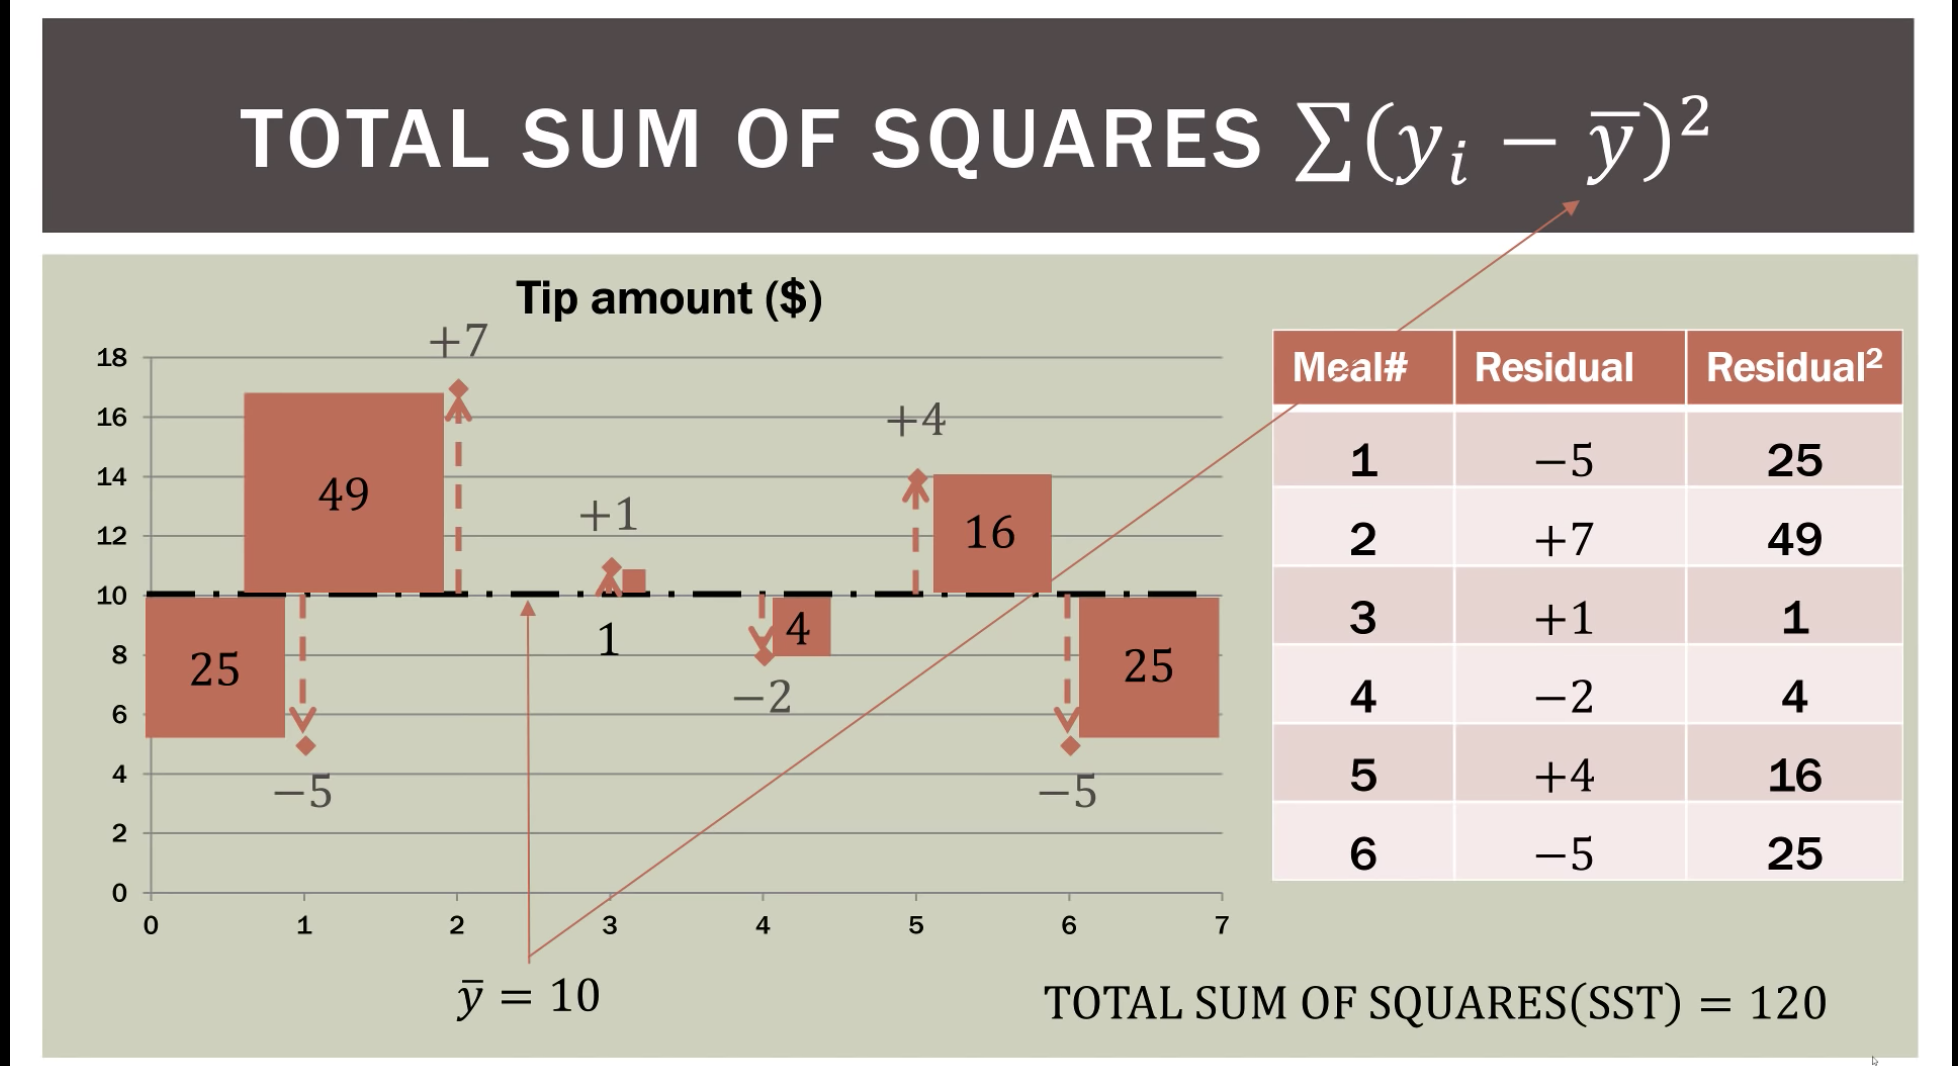

In [ ]:
from IPython.display import Image
Image(filename='square_error.png') 

In [ ]:
# sse
np.sum((y_pred - y_test)**2)

tip    11.18969
dtype: float64

In [ ]:
# mse
np.sum((y_pred - y_test)**2) / (len(y_pred))

tip    1.118969
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("SSE     :", mse*len(min_df))
print('MSE    : %0.2f ' % mse)


SSE     : 11.18969
MSE    : 1.12 


In order to know if the prediction is good or bad, we will compare it to the mean prediction.

### Standard Error of the Estimates

Additional mertic is the square root of the error, which is the average distance of the data points from the regression line. In this case it's 1.06$

In [ ]:
rmse = mean_squared_error(y_test, y_pred)**0.5
print('RMSE   : %0.2f ' % rmse)

RMSE   : 1.06 


### R^2

*The* sum of squares due to regression (SSR), divided by the total sum of squares (SST).

How much veration is actualy explained by the model, what our model contributes to the preditction

In [ ]:
from sklearn.metrics import r2_score 

In [ ]:
y_test

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
5,4.71
6,2.00
7,3.12
8,1.96
9,3.23


A constant model which always predict the mean value of y, will get the score 0.
Best score is 1. A negative score means the model fits the data poorly

In [ ]:
r2 = r2_score(y_test, y_pred)
print('R2     : %0.2f ' % r2)

R2     : 0.00 


Additional read: https://statisticsbyjim.com/regression/interpret-r-squared-regression/

### Prediction of two variables

We suspect that the total bill size affects the tip size

A precondition: does a statistical lenear relationship exists between the two variables?

Let's conduct features correlation

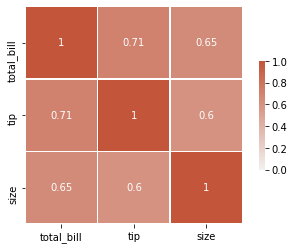

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr = min_df.corr()
sns.heatmap(corr,  cmap=cmap, center=0, annot=True, vmin=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

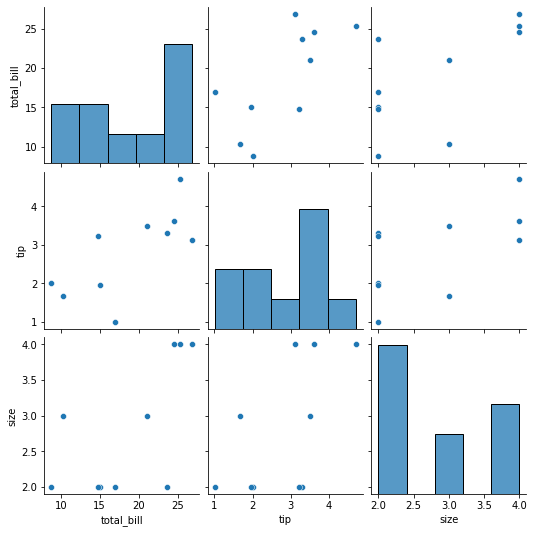

In [ ]:
sns.pairplot(min_df)

We see a high positive correlation between tip-size, and tip-total_bill

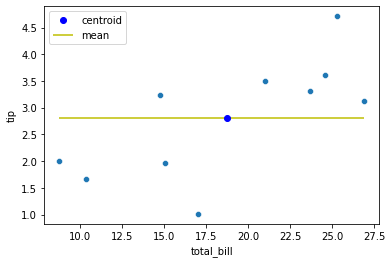

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=min_df)
plt.hlines(min_df['tip'].mean(), min_df['total_bill'].min(),  min_df['total_bill'].max(), colors='y', label='mean')
plt.plot(min_df['total_bill'].mean(), min_df['tip'].mean(), 'bo', label='centroid')         
plt.legend()

Every regression line will pass throught the centroid

Our goal is to find a line which will minize the mean squared error

In [ ]:
min_df[['total_bill', 'size']]

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4
5,25.29,4
6,8.77,2
7,26.88,4
8,15.04,2
9,14.78,2


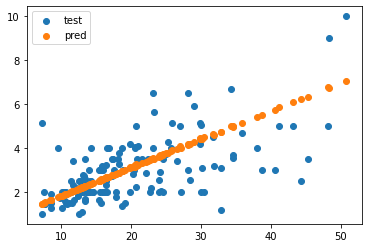

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# create train set and test set
min_df = df[:100]
y_train = min_df[['tip']]
X_train = min_df[['total_bill', 'size']]
X_test = df[100:][['total_bill', 'size']]
y_test = df[100:][['tip']]

### Normalization / Standartization
# https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
# use a scaler in order to bring the data to the same scale

#### Use either normalization
sc_x = MinMaxScaler()
X_train_s = sc_x.fit_transform(X_train)
X_test_s = sc_x.transform(X_test)

#### Or standartization
sc_x = StandardScaler()
X_train_s = sc_x.fit_transform(X_train)
X_test_s = sc_x.transform(X_test)

# [Optional - generally not required] the y_train data should be at the same scale as well
# we use a diffrent scaller for the diffrenet feature
#sc_y = StandardScaler()
#y_train_s = sc_y.fit_transform(y_train)
y_train_s = y_train

## Model
# apply linear regression algorithm in order to find the regression line
c_lr = LinearRegression()
c_lr.fit(X_train_s, y_train_s)
y_pred_s = c_lr.predict(X_test_s)

# 
#y_pred = sc_y.inverse_transform(y_pred_s)
y_pred = y_pred_s

plt.scatter(X_test[['total_bill']], y_test, label='test')
plt.scatter(X_test[['total_bill']], y_pred, label='pred')
plt.legend()

In [102]:
df2 = pd.DataFrame(X_test)
df2

,total_bill,size
100,11.35,2
101,15.38,2
102,44.30,3
103,22.42,2
104,20.92,2
...,...,...
239,29.03,3
240,27.18,2
241,22.67,2
242,17.82,2


In [104]:
df2['y_test'] = y_test
df2['y_pred'] =  y_pred
df2

,total_bill,size,y_test,y_pred
100,11.35,2,2.50,1.994830
101,15.38,2,3.00,2.507587
102,44.30,3,2.50,6.210986
103,22.42,2,3.48,3.403322
104,20.92,2,4.08,3.212469
...,...,...,...,...
239,29.03,3,5.92,4.268107
240,27.18,2,2.00,4.008960
241,22.67,2,2.00,3.435130
242,17.82,2,1.75,2.818040


In [106]:
df2['abs_error'] = np.abs(df2['y_test'] - df2['y_pred'])
df2

,total_bill,size,y_test,y_pred,abs_error
100,11.35,2,2.50,1.994830,0.505170
101,15.38,2,3.00,2.507587,0.492413
102,44.30,3,2.50,6.210986,3.710986
103,22.42,2,3.48,3.403322,0.076678
104,20.92,2,4.08,3.212469,0.867531
...,...,...,...,...,...
239,29.03,3,5.92,4.268107,1.651893
240,27.18,2,2.00,4.008960,2.008960
241,22.67,2,2.00,3.435130,1.435130
242,17.82,2,1.75,2.818040,1.068040


In [107]:
df2[df2['abs_error'] > 2]

,total_bill,size,y_test,y_pred,abs_error
102,44.30,3,2.50,6.210986,3.710986
170,50.81,3,10.00,7.039287,2.960713
172,7.25,2,5.15,1.473166,3.676834
178,9.60,2,4.00,1.772168,2.227832
181,23.33,2,5.65,3.519106,2.130894
182,45.35,3,3.50,6.344583,2.844583
183,23.17,4,6.50,3.546272,2.953728
184,40.55,2,3.00,5.710093,2.710093
187,30.46,5,2.00,4.497578,2.497578
207,38.73,4,3.00,5.526049,2.526049


In [ ]:
|

r2 = r2_score(y_test, y_pred)
r2

0.32505458468995285

In [ ]:
c_lr.coef_

array([[0.78229891, 0.01517627]])

In [ ]:
c_lr.intercept_

array([6.16841056e-17])

### Practice (HW)
Add 'size' as another parameter to X_train and calculate R2 for the new prediction.
Does 'size' help to predict resutls better than using only 'total_bill'?

Bonus: scatter the new predication to visualize it next to the old one

In [ ]:
y_pred

array([[1.76892626],
       [4.73966651],
       [2.26143454],
       [3.13016858],
       [2.20501126],
       [2.85053182],
       [2.06510406],
       [2.63507481],
       [2.70010503],
       [3.05203328]])

In [ ]:
pd.DataFrame(y_pred, columns=['tip'])

,tip
0,1.768926
1,4.739667
2,2.261435
3,3.130169
4,2.205011
5,2.850532
6,2.065104
7,2.635075
8,2.700105
9,3.052033


### Is it better?

Let's calculate the MSE

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("SSE     :", mse*len(min_df))
print('MSE    : %0.2f ' % mse)
rmse = mean_squared_error(y_test, y_pred)**0.5
print('RMSE   : %0.2f ' % rmse)
r2 = r2_score(y_test, y_pred)
print('R2     : %0.2f ' % r2)

SSE     : 4.414427746946976
MSE    : 0.44 
RMSE   : 0.66 
R2     : 0.61 


Much lower! Meaning, 'size' feature helps predict the tip.
Meaning, we've improved the model by 50%


We can see the linear regression line using the following plot

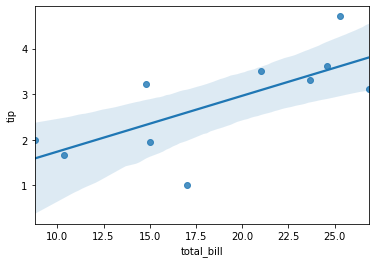

In [ ]:
sns.regplot(x='total_bill', y='tip', data=min_df)


Let's try with the full data set

In [ ]:
from sklearn.model_selection import cross_val_score

y_train = df[['tip']]
X_train = df[['total_bill']]
y_mean_pred = pd.DataFrame(df['tip'].mean() * np.ones(len(df['tip'])), columns=['tip'])

clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_lr.predict(X_train)
y_pred[:10]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


array([[2.70463616],
       [2.00622312],
       [3.12683472],
       [3.40725019],
       [3.5028225 ],
       [3.57633966],
       [1.84133463],
       [3.74332864],
       [2.49983836],
       [2.47253198]])

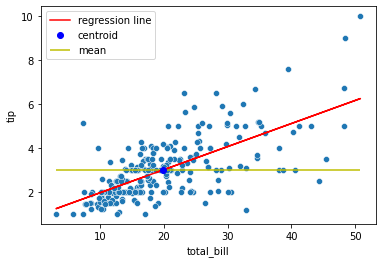

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.hlines(df['tip'].mean(), df['total_bill'].min(),  df['total_bill'].max(), colors='y', label='mean')
plt.plot(X_train, y_pred, 'r', label='regression line')
plt.plot(df['total_bill'].mean(), df['tip'].mean(), 'bo', label="centroid")         
plt.legend()


In [ ]:
y_pred

array([[2.70463616],
       [2.00622312],
       [3.12683472],
       [3.40725019],
       [3.5028225 ],
       [3.57633966],
       [1.84133463],
       [3.74332864],
       [2.49983836],
       [2.47253198],
       [1.99887141],
       [4.6234341 ],
       [2.53974767],
       [2.85587147],
       [2.47778321],
       [3.1866987 ],
       [2.00517288],
       [2.631119  ],
       [2.70253567],
       [3.0890259 ],
       [2.80230897],
       [3.05121707],
       [2.57650625],
       [5.06033609],
       [3.00185555],
       [2.79075627],
       [2.32444741],
       [2.25303074],
       [3.19930164],
       [2.98400138],
       [1.92325375],
       [2.84746951],
       [2.50193885],
       [3.09322688],
       [2.78760553],
       [3.4471595 ],
       [2.63321949],
       [2.69833469],
       [2.88317784],
       [4.20438627],
       [2.60486287],
       [2.75399769],
       [2.38431139],
       [1.93690694],
       [4.11301494],
       [2.84116804],
       [3.25496464],
       [4.323

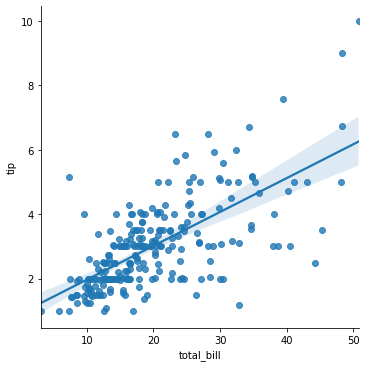

In [ ]:
sns.lmplot(x='total_bill', y='tip', data=df)

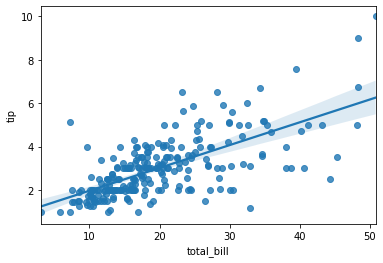

In [ ]:
sns.regplot(x='total_bill', y='tip', data=df)

In [ ]:
mse = mean_squared_error(y_train, y_pred)
print("SE     :", mse*len(df))
print('MSE    : %0.2f ' % mse)

rmse = mean_squared_error(y_train, y_pred)**0.5
print('RMSE   : %0.2f ' % rmse)
r2 = r2_score(y_train, y_pred)
print('R2   : %0.2f ' % r2)


SE     : 252.788743850776
MSE    : 1.04 
RMSE   : 1.02 
R2   : 0.46 


Creating another regression line where x > 25

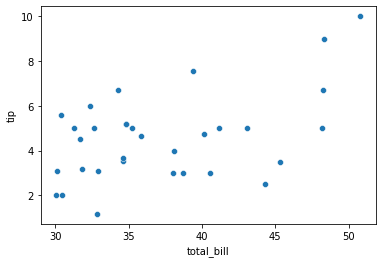

In [ ]:
bill25_set = df[df['total_bill'] > 30]
sns.scatterplot(x='total_bill', y='tip', data=bill25_set)


In [ ]:
y_train_o = y_train
X_train_o = X_train
y_pred_o = y_pred

y_train = bill25_set[['tip']]
X_train = bill25_set[['total_bill']]
y_mean_pred = pd.DataFrame(bill25_set['tip'].mean() * np.ones(len(df['tip'])), columns=['tip'])

clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_lr.predict(X_train)
y_pred[:10]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


array([[4.25218906],
       [4.90805019],
       [3.62312996],
       [3.48596669],
       [3.80128454],
       [4.18124255],
       [4.68575111],
       [6.30333167],
       [3.84542904],
       [4.18439573]])

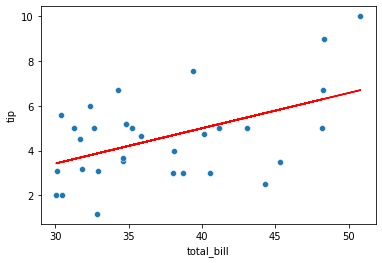

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=bill25_set)
plt.plot(X_train, y_pred, 'r', label='regression line')

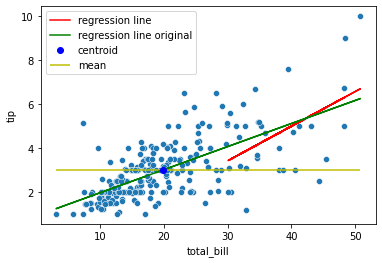

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.hlines(df['tip'].mean(), df['total_bill'].min(),  df['total_bill'].max(), colors='y', label='mean')
plt.plot(X_train, y_pred, 'r', label='regression line')
plt.plot(X_train_o, y_pred_o, 'g', label='regression line original')
plt.plot(df['total_bill'].mean(), df['tip'].mean(), 'bo', label="centroid")         
plt.legend()

In [ ]:
mse = mean_squared_error(y_train, y_pred)
print("E     :", mse*len(bill25_set))
print('MSE    : %0.2f ' % mse)

rmse = mean_squared_error(y_train, y_pred)**0.5
print('RMSE    : %0.2f ' % rmse)

E     : 89.7121595290704
MSE    : 2.80 
RMSE    : 1.67 
